model 





In [1]:
import keras
#from cnnmodel import model
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import os, random, cv2
from keras.utils import to_categorical

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def createFileList(myDir):
    format = ('.tiff','.jpg','.png','.PNG')
    fileList = []
    print(os.walk(myDir, topdown=False))
    for root, dirs, files in os.walk(myDir, topdown=False):
        
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList 

In [3]:
classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}




batch_size = 32
epochs = 60



#train_dir에 적용
#e.g. case sad
#path 읽어 = [(1,227,227)만들기 |  파싱하여 label 얻기] 

#train_x.append(q)
'''
z = load_img(path = './data/train/sad/KA.SA2.34.tiff', grayscale=True, target_size=(227,227),
    interpolation='nearest')
q=np.asarray(z).astype('float32')
print(np.asarray([q]).shape)
q = np.asarray([q])
'''

fileList = []
fileList = createFileList('./data/total')

<generator object walk at 0x7f2b2470bf68>


In [4]:
len(fileList)

2526

In [5]:
train_x = [] #(10000,1,227,227) (1,227,227)에 대해 append
train_y = [] #(10000, 6) 

for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    train_x.append(q)
    
    t = -1
    for y in classes.items():
        if y[1] in x:
            print(y[0])
            t = y[0]
        
    train_y.append(to_categorical(t, 6))

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
print(train_x.shape)   
print(train_y.shape)   

train_len = train_x.shape[0]

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [6]:
#이상  train_x/ train_y 구성 끝

#val_x/ val_y 도 일단 똑같이 구성

val_x = []
val_y = []


fileList = createFileList('./data/total')



for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    val_x.append(q)
    
    t = -1
    for y in classes.items():
        if y[1] in x:
            t = y[0]
        
    val_y.append(to_categorical(t, 6))

val_x = np.asarray(val_x)
val_y = np.asarray(val_y)
print(val_x.shape)   
print(val_y.shape)   

val_len = train_x.shape[0]


<generator object walk at 0x7f2b2470bfc0>
(2526, 1, 227, 227)
(2526, 6)


In [7]:

"""
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rescale=1./255,
    rotation_range=10,
    shear_range=0.1,
    fill_mode = 'constant',
    cval = 0,
    horizontal_flip=True)

print(train_x.shape)
train_x_moveaxis = np.moveaxis(train_x, 1, 3)  
print(train_x_moveaxis.shape)
train_datagen.fit(train_x_moveaxis)

train_x_mean = train_datagen.mean"""


"\ntrain_datagen = ImageDataGenerator(\n    featurewise_center=True,\n    featurewise_std_normalization=True,\n    #rescale=1./255,\n    rotation_range=10,\n    shear_range=0.1,\n    fill_mode = 'constant',\n    cval = 0,\n    horizontal_flip=True)\n\nprint(train_x.shape)\ntrain_x_moveaxis = np.moveaxis(train_x, 1, 3)  \nprint(train_x_moveaxis.shape)\ntrain_datagen.fit(train_x_moveaxis)\n\ntrain_x_mean = train_datagen.mean"

In [8]:
train_datagen = ImageDataGenerator(
    #samplewise_center=True,
    samplewise_std_normalization=True,
    #featurewise_std_normalization=True,
    #rescale=1./255,
    #rotation_range=10,
    rotation_range=25,
    shear_range=0.17,
    zoom_range=0.17,
    width_shift_range=0.15,
    height_shift_range=0.15,    
    fill_mode = 'constant',
    cval = 0,
    horizontal_flip=True)
    

print(train_x.shape)
train_x_moveaxis = np.moveaxis(train_x, 1, 3)
print(train_x_moveaxis.shape)
train_datagen.fit(train_x_moveaxis)



(2526, 1, 227, 227)
(2526, 227, 227, 1)


/opt/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py:511: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [9]:

"""
SampleWise Normalization에 대한 확인 코드 

#temp = train_datagen.flow(train_x_moveaxis, train_y, batch_size =3)
a =temp.next()
a[0][1].shape
print(np.average(a[0][2]))
print(np.std(a[0][2]))

#print(a[0][0].shape)
"""


'\nSampleWise Normalization에 대한 확인 코드 \n\n#temp = train_datagen.flow(train_x_moveaxis, train_y, batch_size =3)\na =temp.next()\na[0][1].shape\nprint(np.average(a[0][2]))\nprint(np.std(a[0][2]))\n\n#print(a[0][0].shape)\n'

In [10]:
val_datagen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    #rescale=1./255, 
)
val_x_moveaxis = np.moveaxis(val_x, 1, 3)  
val_datagen.fit(val_x_moveaxis)
#val_datagen.mean = x꺼 배끼끼
#print(val_datagen.mean)
#val_datagen.mean = train_x_mean
#print(val_datagen.mean)

/opt/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py:511: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [11]:
#sequential model definition
#model.compile
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.layers.normalization import BatchNormalization


def model_generate():
    img_rows, img_cols = 227, 227
    model = Sequential()
    model.add(Convolution2D(36, 11, 11, border_mode='valid',
                            input_shape=(img_rows, img_cols,1)))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(2, 2), dim_ordering='tf'))
    model.add(MaxPooling2D(pool_size=(5, 5),strides=(2, 2)))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf')) 
    
    model.add(Convolution2D(96, 5, 5))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf')) 
    
    model.add(Convolution2D(144, 3, 3))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
     
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf'))
    model.add(Convolution2D(96, 3, 3))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf'))
    model.add(Convolution2D(128, 3, 3))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
     
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf'))
    model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
     
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(Dropout(0.2))
     
      
    model.add(Dense(6))
    model.add(BatchNormalization())
      
    model.add(Activation('softmax'))

    ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    #model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy',
                  optimizer=ada,
                  metrics=['accuracy'])
    model.summary()
    return model

model = model_generate()


filepath='samplewise_norm_model+aug+additive+confusion_v2_refit.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (11, 11), input_shape=(227, 227,..., padding="valid")`
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  app.launch_new_instance()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(2, 2), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (5, 5))`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 217, 217, 36)      4392      
_________________________________________________________________
batch_normalization_1 (Batch (None, 217, 217, 36)      144       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 217, 217, 36)      1695204   
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 221, 221, 36)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 36)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 111, 111, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 96)      86496     
__________

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`


In [12]:
model.fit_generator(train_datagen.flow(train_x_moveaxis, train_y, batch_size =batch_size),
                    #steps_per_epoch = train_len/batch_size*12,
                    steps_per_epoch = train_len/batch_size*12,
                    epochs = epochs,
                    validation_data = val_datagen.flow(val_x_moveaxis,val_y,batch_size = batch_size),
                    callbacks = [checkpointer])

#l = train_datagen.flow(train_x_moveaxis, train_y, batch_size =batch_size)

#next(l)[0].shape

Epoch 1/60
948/947 [==============================] - 333s 352ms/step - loss: 1.4146 - acc: 0.4503 - val_loss: 1.3596 - val_acc: 0.4663

Epoch 00001: val_acc improved from -inf to 0.46635, saving model to samplewise_norm_model+aug+additive+confusion_v2_refit.hdf5
Epoch 2/60
948/947 [==============================] - 294s 310ms/step - loss: 1.0535 - acc: 0.6393 - val_loss: 1.4367 - val_acc: 0.5174

Epoch 00002: val_acc improved from 0.46635 to 0.51742, saving model to samplewise_norm_model+aug+additive+confusion_v2_refit.hdf5
Epoch 3/60
948/947 [==============================] - 294s 310ms/step - loss: 0.8823 - acc: 0.7237 - val_loss: 0.8945 - val_acc: 0.6587

Epoch 00003: val_acc improved from 0.51742 to 0.65875, saving model to samplewise_norm_model+aug+additive+confusion_v2_refit.hdf5
Epoch 4/60
948/947 [==============================] - 294s 310ms/step - loss: 0.7651 - acc: 0.7828 - val_loss: 0.7876 - val_acc: 0.7415

Epoch 00004: val_acc improved from 0.65875 to 0.74149, saving mod

In [13]:
classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}
#vd = val_datagen.flow(val_x_moveaxis,val_y,batch_size = 1)
#sample = vd.next()
#sample_x,sample_y = sample
#print(sam)


A total data # * steps for epochs / batchsize  ==  172 
Therefore, 172 * 32(batchsize) == A total data #

In [14]:
#from keras.models import load_model
#model_1 = keras.load("samplewise_norm_model+aug+additive+confusion.hdf5")
#model_1 = load_model("samplewise_norm_model+aug+additive+confusion.hdf5")
test_x = [] #(10000,1,227,227) (1,227,227)에 대해 append
test_y = [] #(10000, 6) 


fileList = []
fileList = createFileList('./data/test')



for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    test_x.append(q)
     
    t = -1
    for y in classes.items():
        if y[1] in x:
            t = y[0]
        
    test_y.append(to_categorical(t, 6))

    
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
print(test_x.shape)   
print(test_y.shape)   
test_x_moveaxis = np.moveaxis(test_x, 1, 3)  
test_x_moveaxis.shape

<generator object walk at 0x7f2aa2d556d0>
(252, 1, 227, 227)
(252, 6)


(252, 227, 227, 1)

In [15]:
test_y[0]

array([0., 0., 0., 0., 1., 0.])

In [16]:
test_datagen = ImageDataGenerator(
    samplewise_std_normalization=True,
    #rescale=1./255, 
)
#print("0hi")
#print(test_datagen.mean)
test_datagen.fit(test_x_moveaxis[:])
#print(test_datagen.mean)
#test_datagen.mean = [[[0]]]
#print(valid_datagen.mean)
"""
TEST CODE
e1 = model.predict_generator(valid_datagen.flow(valid_x_moveaxis,valid_y,batch_size = 1,shuffle= False))
print(valid_datagen.mean)
print([np.argmax(pre) for pre in e1])
#print(val_x_moveaxis[0])
#print(val_y)
print(e1)
print([np.argmax(x) for x in valid_y])

"""
#classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}
gener = test_datagen.flow(test_x_moveaxis, test_y, batch_size = 1,shuffle= False)
pred_batch = model.predict_generator(test_datagen.flow(test_x_moveaxis,test_y,batch_size = 1,shuffle= False))
#e1은 (batchsize, 6) e1[0] == (0.12233, 0.123142, 0.12312, 0.11, 0.01, 0.34342)
#batchsize 를 아싸리 test 모든 set 크기로 해놓고 200, 6 
#y_pred = [np.argmax(x) for x in pred_batch] 
#y_true = [np.argmax(x) for x in valid_y]



/opt/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py:511: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [17]:
pred_batch.shape

(252, 6)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap != None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)
classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}
ymap = ['angry', 'fear', 'happy','neutral', 'sad','surprise']
labels = [0,1,2,3,4,5]
y_pred = [np.argmax(x) for x in pred_batch] 
y_true = [np.argmax(x) for x in test_y]

In [19]:
y_true

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


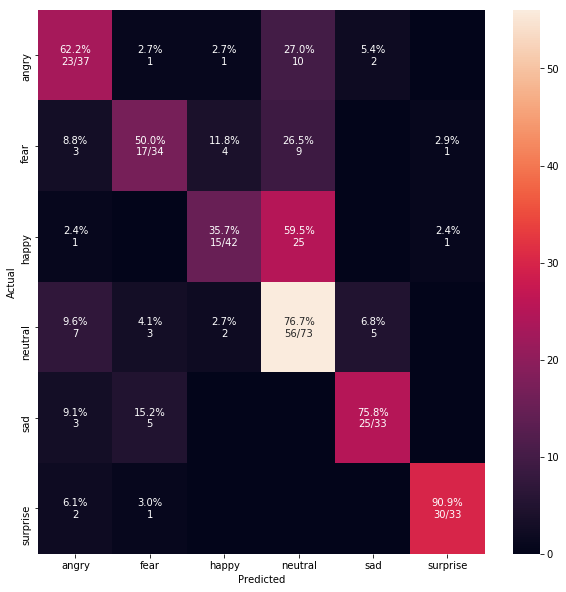

In [20]:
filename = "./conjusion3.jpg"
cm_analysis(y_true, y_pred,filename,labels, ymap=classes)

In [ ]:
filename